### ShuffleNEt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet18 import ResNet18
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import keras
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from keras.models import Model,Sequential,  load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
#from keras.optimizers import adam_v2

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications.vgg16 import VGG16

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import pandas as pd
import numpy as np
import os
import sys
from shutil import copyfile
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator
imagegen = ImageDataGenerator()


In [61]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load train data from drive
disease_types = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Grape___healthy', 'Grape___Leaf_blight', 'Grape___Esca', 'Grape___Black_rot',
    'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight'
]

imagegen = ImageDataGenerator()
train_generator = imagegen.flow_from_directory(
    '/content/drive/MyDrive/BitkiHastaligiTeshisi - OzgeOzaras/Mini_SqueezeNet_New/Kodlar/dataset',
    shuffle=False,
    batch_size=64,
    target_size=(224, 224),
    seed=42
)

# Initialize empty lists to store data
x = []
y = []

# Iterate through the generator
for _ in range(train_generator.samples // train_generator.batch_size):
    batch_x, batch_y = next(train_generator)  # Get the next batch
    x.append(batch_x)
    y.append(batch_y)

# Concatenate all batches into a single array
x = np.concatenate(x)
y = np.concatenate(y)

print(x.shape)
print(y.shape)

Found 9385 images belonging to 11 classes.
(9344, 224, 224, 3)
(9344, 11)


In [62]:
#Converting  our color images to a vector
x=x.reshape(9344,224*224*3)

In [63]:
x.shape

(9344, 150528)

In [64]:
#Apply SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_smote, y_smote = sm.fit_resample(x, y)

In [65]:
X_smote.shape

(18095, 150528)

In [66]:
X_smote=X_smote.reshape(18095,224,224,3)

In [67]:
print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X_smote.shape}''')



Shape of X before SMOTE: (9344, 150528)
Shape of X after SMOTE: (18095, 224, 224, 3)


In [68]:
IMAGE_SIZE = 224
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag
# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)


In [69]:
# Normalize the data
X_smote = X_smote / 255.
print('Train Shape: {}'.format(X_smote.shape))


Train Shape: (18095, 224, 224, 3)


In [70]:
X_train, X_val, Y_train, Y_val = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [71]:
EPOCHS = 100
BATCH_SIZE=64
SIZE=224
N_ch=3

In [17]:
from keras import backend as K
K.clear_session()

In [18]:
pip install Keras

In [19]:
pip install keras_applications

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.4 MB/s eta 0:00:00


In [20]:

from keras.utils import plot_model
from keras_applications.imagenet_utils import _obtain_input_shape
#from tensorflow.keras.engine.topology import get_source_inputs
from keras.layers import Input, Conv2D, MaxPool2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dense
from keras.models import Model
import keras.backend as K
import os
from keras import backend as K
from keras.models import Model
#from keras.engine.topology import get_source_inputs
from keras.layers import Activation, Add, Concatenate, Conv2D, GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D,Input, Dense
from keras.layers import MaxPool2D,AveragePooling2D, BatchNormalization, Lambda, DepthwiseConv2D
import numpy as np
from keras.layers import Lambda

def channel_split(inputs, name):
    """Splits the input tensor into two parts along the channel axis."""
    channel_axis = -1 if K.image_data_format() == 'channels_last' else 1

    # Calculate the number of channels and split size
    channels = tf.keras.backend.int_shape(inputs)[channel_axis]
    split_channels = channels // 2

    # Use Lambda layers to split the channels
    return Lambda(lambda x: x[..., :split_channels], name=name + '_split1')(inputs), \
           Lambda(lambda x: x[..., split_channels:], name=name + '_split2')(inputs)

def channel_shuffle(x):
    height, width, channels = x.shape[1:]  # Tuple'dan boyutları al
    channels_per_split = channels // 2
    x = tf.reshape(x, [-1, height, width, 2, channels_per_split])  # tf.reshape kullan
    x = tf.transpose(x, perm=[0, 1, 2, 4, 3])  # Permute to shuffle channels
    x = tf.reshape(x, [-1, height, width, channels])  # tf.reshape kullan
    return x

def shuffle_unit(inputs, out_channels, bottleneck_ratio, strides=2, stage=1, block=1):
    if K.image_data_format() == 'channels_last':
        bn_axis = -1
    else:
        raise ValueError('Only channels last supported')

    prefix = 'stage{}-block{}'.format(stage, block)
    bottleneck_channels = int(out_channels * bottleneck_ratio)

    if strides < 2:
        c_hat, c = channel_split(inputs, '{}_spl'.format(prefix))
        inputs = c

    x = Conv2D(bottleneck_channels, kernel_size=(1, 1), strides=1, padding='same', name='{}_1x1conv_1'.format(prefix))(inputs)
    x = BatchNormalization(axis=bn_axis, name='{}_bn_1x1conv_1'.format(prefix))(x)
    x = Activation('relu', name='{}_relu_1x1conv_1'.format(prefix))(x)
    x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same', name='{}_3x3dwconv'.format(prefix))(x)
    x = BatchNormalization(axis=bn_axis, name='{}_bn_3x3dwconv'.format(prefix))(x)
    x = Conv2D(bottleneck_channels, kernel_size=1, strides=1, padding='same', name='{}_1x1conv_2'.format(prefix))(x)
    x = BatchNormalization(axis=bn_axis, name='{}_bn_1x1conv_2'.format(prefix))(x)
    x = Activation('relu', name='{}_relu_1x1conv_2'.format(prefix))(x)

    if strides < 2:
        ret = Concatenate(axis=bn_axis, name='{}_concat_1'.format(prefix))([x, c_hat])
    else:
        s2 = DepthwiseConv2D(kernel_size=3, strides=2, padding='same', name='{}_3x3dwconv_2'.format(prefix))(inputs)
        s2 = BatchNormalization(axis=bn_axis, name='{}_bn_3x3dwconv_2'.format(prefix))(s2)
        s2 = Conv2D(bottleneck_channels, kernel_size=1, strides=1, padding='same', name='{}_1x1_conv_3'.format(prefix))(s2)
        s2 = BatchNormalization(axis=bn_axis, name='{}_bn_1x1conv_3'.format(prefix))(s2)
        s2 = Activation('relu', name='{}_relu_1x1conv_3'.format(prefix))(s2)
        ret = Concatenate(axis=bn_axis, name='{}_concat_2'.format(prefix))([x, s2])

    # tf.keras.backend.int_shape ile output_shape belirleyin
    ret_shape = tf.keras.backend.int_shape(ret)
    ret = Lambda(channel_shuffle, output_shape=(ret_shape[1], ret_shape[2], ret_shape[3]), name='{}_channel_shuffle'.format(prefix))(ret)

    return ret

def block(x, channel_map, bottleneck_ratio, repeat=1, stage=1):
    x = shuffle_unit(x, out_channels=channel_map[stage-1],
                      strides=2,bottleneck_ratio=bottleneck_ratio,stage=stage,block=1)

    for i in range(1, repeat+1):
        x = shuffle_unit(x, out_channels=channel_map[stage-1],strides=1,
                          bottleneck_ratio=bottleneck_ratio,stage=stage, block=(1+i))

    return x


def ShuffleNetV2(include_top=True,
                 input_tensor=None,
                 scale_factor=1.0,
                 pooling='max',
                 input_shape=(224,224,3),
                 load_model=None,
                 num_shuffle_units=[3,7,3],
                 bottleneck_ratio=1,
                 classes=11):
    if K.backend() != 'tensorflow':
        raise RuntimeError('Only tensorflow supported for now')
    name = 'ShuffleNetV2_{}_{}_{}'.format(scale_factor, bottleneck_ratio, "".join([str(x) for x in num_shuffle_units]))
    input_shape = _obtain_input_shape(input_shape, default_size=224, min_size=28, require_flatten=include_top,
                                      data_format=K.image_data_format())
    out_dim_stage_two = {0.5:48, 1:116, 1.5:176, 2:244}

    if pooling not in ['max', 'avg']:
        raise ValueError('Invalid value for pooling')
    if not (float(scale_factor)*4).is_integer():
        raise ValueError('Invalid value for scale_factor, should be x over 4')
    exp = np.insert(np.arange(len(num_shuffle_units), dtype=np.float32), 0, 0)  # [0., 0., 1., 2.]
    out_channels_in_stage = 2**exp
    out_channels_in_stage *= out_dim_stage_two[bottleneck_ratio]  #  calculate output channels for each stage
    out_channels_in_stage[0] = 24  # first stage has always 24 output channels
    out_channels_in_stage *= scale_factor
    out_channels_in_stage = out_channels_in_stage.astype(int)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    # create shufflenet architecture
    x = Conv2D(filters=out_channels_in_stage[0], kernel_size=(3, 3), padding='same', use_bias=False, strides=(2, 2),
               activation='relu', name='conv1')(img_input)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='maxpool1')(x)

    # create stages containing shufflenet units beginning at stage 2
    for stage in range(len(num_shuffle_units)):
        repeat = num_shuffle_units[stage]
        x = block(x, out_channels_in_stage,
                   repeat=repeat,
                   bottleneck_ratio=bottleneck_ratio,
                   stage=stage + 2)

    if bottleneck_ratio < 2:
        k = 1024
    else:
        k = 2048
    x = Conv2D(k, kernel_size=1, padding='same', strides=1, name='1x1conv5_out', activation='relu')(x)

    if pooling == 'avg':
        x = GlobalAveragePooling2D(name='global_avg_pool')(x)
    elif pooling == 'max':
        x = GlobalMaxPooling2D(name='global_max_pool')(x)

    if include_top:
        x = Dense(classes, name='fc')(x)
        x = Activation('softmax', name='softmax')(x)

    if input_tensor:
        inputs = get_source_inputs(input_tensor)

    else:
        inputs = img_input

    model = Model(inputs, x, name=name)

    if load_model:
        model.load_weights('imagenet', by_name=True)

    return model


In [21]:
model = ShuffleNetV2(input_shape=(224, 224, 3), classes=11)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "ShuffleNetV2_1.0_1_373"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv2D)            │ (None, 112, 112, 24)   │            648 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ maxpool1 (MaxPooling2D)   │ (None, 56, 56, 24)     │              0 │ conv1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_1x1conv_1   │ (None, 56, 56, 116)    │          2,900 │ maxpool1[0][0]         │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_bn_1x1conv… │ (None, 56, 56, 116)    │            464 │ stage2-block1_1x1conv… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_relu_1x1co… │ (None, 56, 56, 116)    │              0 │ stage2-block1_bn_1x1c… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_3x3dwconv   │ (None, 28, 28, 116)    │          1,160 │ stage2-block1_relu_1x… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_3x3dwconv_2 │ (None, 28, 28, 24)     │            240 │ maxpool1[0][0]         │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_bn_3x3dwco… │ (None, 28, 28, 116)    │            464 │ stage2-block1_3x3dwco… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_bn_3x3dwco… │ (None, 28, 28, 24)     │             96 │ stage2-block1_3x3dwco… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_1x1conv_2   │ (None, 28, 28, 116)    │         13,572 │ stage2-block1_bn_3x3d… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_1x1_conv_3  │ (None, 28, 28, 116)    │          2,900 │ stage2-block1_bn_3x3d… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_bn_1x1conv… │ (None, 28, 28, 116)    │            464 │ stage2-block1_1x1conv… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_bn_1x1conv… │ (None, 28, 28, 116)    │            464 │ stage2-block1_1x1_con… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 4,030,015 (15.37 MB)

 Trainable params: 4,001,895 (15.27 MB)

 Non-trainable params: 28,120 (109.84 KB)

None


In [22]:
EPOCHS = 100
BATCH_SIZE=64
SIZE=224
N_ch=3

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "ShuffleNetV2_1.0_1_373"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv2D)            │ (None, 112, 112, 24)   │            648 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ maxpool1 (MaxPooling2D)   │ (None, 56, 56, 24)     │              0 │ conv1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_1x1conv_1   │ (None, 56, 56, 116)    │          2,900 │ maxpool1[0][0]         │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_bn_1x1conv… │ (None, 56, 56, 116)    │            464 │ stage2-block1_1x1conv… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_relu_1x1co… │ (None, 56, 56, 116)    │              0 │ stage2-block1_bn_1x1c… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_3x3dwconv   │ (None, 28, 28, 116)    │          1,160 │ stage2-block1_relu_1x… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_3x3dwconv_2 │ (None, 28, 28, 24)     │            240 │ maxpool1[0][0]         │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_bn_3x3dwco… │ (None, 28, 28, 116)    │            464 │ stage2-block1_3x3dwco… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_bn_3x3dwco… │ (None, 28, 28, 24)     │             96 │ stage2-block1_3x3dwco… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_1x1conv_2   │ (None, 28, 28, 116)    │         13,572 │ stage2-block1_bn_3x3d… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_1x1_conv_3  │ (None, 28, 28, 116)    │          2,900 │ stage2-block1_bn_3x3d… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_bn_1x1conv… │ (None, 28, 28, 116)    │            464 │ stage2-block1_1x1conv… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage2-block1_bn_1x1conv… │ (None, 28, 28, 116)    │            464 │ stage2-block1_1x1_con… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 4,030,015 (15.37 MB)

 Trainable params: 4,001,895 (15.27 MB)

 Non-trainable params: 28,120 (109.84 KB)

None


In [24]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Update filepath to use .keras extension
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# You can now fit your model and include these callbacks
# Example:
# model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, callbacks=[es, mc])


In [25]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [26]:
hist=model.fit(X_train, Y_train,
               batch_size=BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               validation_data=(X_val, Y_val),
               callbacks=[es,mc])

Epoch 1/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.4093 - loss: 2.2664
Epoch 1: val_accuracy improved from -inf to 0.09367, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 108s 206ms/step - accuracy: 0.4102 - loss: 2.2620 - val_accuracy: 0.0937 - val_loss: 2.4756
Epoch 2/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8676 - loss: 0.3706
Epoch 2: val_accuracy did not improve from 0.09367
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.8677 - loss: 0.3704 - val_accuracy: 0.0937 - val_loss: 3.3256
Epoch 3/100
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9351 - loss: 0.1864
Epoch 3: val_accuracy improved from 0.09367 to 0.56369, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9352 - loss: 0.1862 - val_accuracy: 0.5637 - val_loss: 1.5928
Epoch 4/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9495 - loss: 0.1557
Epoch 4: val_accuracy improved from 0.56369 to 0.63139, saving

In [27]:
from keras import config

config.enable_unsafe_deserialization()

# Now load the model
saved_model = load_model('best_model.keras', custom_objects={'channel_shuffle': channel_shuffle})



In [28]:
y_pred = saved_model.predict(X_val)

114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step


In [29]:
y_pred=np.argmax(y_pred, axis=1)

In [30]:
Y_val=np.argmax(Y_val, axis=-1)

In [31]:

print("Doğruluk: ",accuracy_score(Y_val, y_pred))
print("F1_Skor: ", f1_score(Y_val, y_pred,average="macro"))
print("Hassasiyet: ",precision_score(Y_val, y_pred,average="macro"))
print("Duyarlılık: ", recall_score(Y_val, y_pred,average="macro"))

Doğruluk:  0.9980657640232108
F1_Skor:  0.9980511873500517
Hassasiyet:  0.9980427283079819
Duyarlılık:  0.9980698492995637


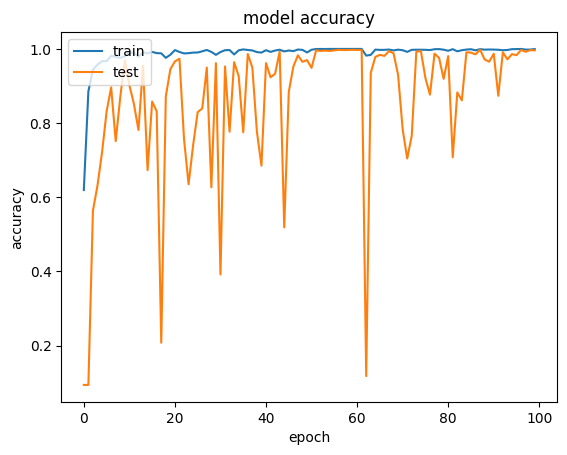

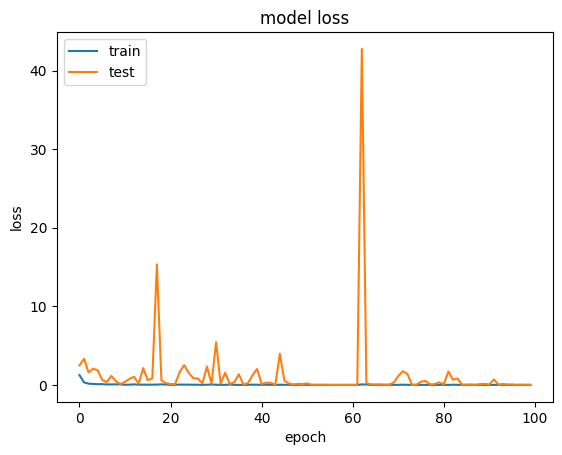

In [32]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[351   0   0   0   0   0   0   0   0   0   0]
 [  0 315   0   0   0   0   0   0   0   0   0]
 [  0   0 339   0   0   0   0   0   0   0   0]
 [  0   0   0 328   0   0   0   1   0   0   1]
 [  0   0   0   0 322   0   0   0   0   0   0]
 [  0   0   0   0   2 331   0   0   0   0   0]
 [  0   0   0   0   1   0 326   0   0   1   0]
 [  0   0   0   0   0   0   0 301   0   0   0]
 [  0   0   0   0   0   0   0   0 345   0   0]
 [  0   0   0   0   0   0   0   0   1 325   0]
 [  0   0   0   0   0   0   0   0   0   0 329]]


<Axes: >

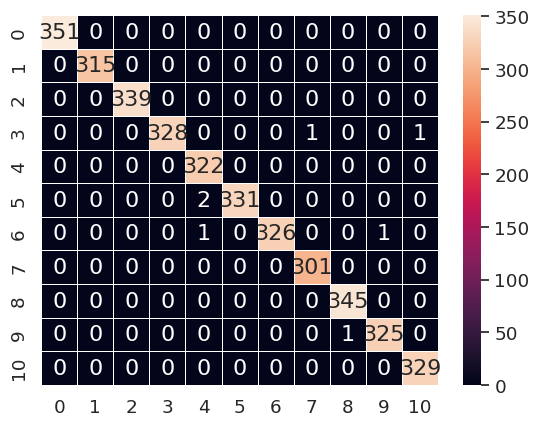

In [33]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_val, y_pred)
print(cm)
sn.set(font_scale=1.2)#for label size
sn.heatmap(cm, annot=True,fmt="d", linewidths=.5 ,annot_kws={"size": 16})# font size

## SquuezeNEt


In [45]:
pip install keras_applications

In [46]:
from keras_applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.models import Model
#from keras.engine.topology import get_source_inputs
from keras.utils import get_file
#from keras.utils import layer_utils

sq1x1 = "squeeze1x1"
exp1x1 = "expand1x1"
exp3x3 = "expand3x3"
relu = "relu_"

WEIGHTS_PATH = "https://github.com/rcmalli/keras-squeezenet/releases/download/v1.0/squeezenet_weights_tf_dim_ordering_tf_kernels.h5"

# Modular function for Fire Node

def fire_module(x, fire_id, squeeze=16, expand=64):
    s_id = 'fire' + str(fire_id) + '-'

    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = 3

    x = Convolution2D(squeeze, (1, 1), padding='valid', name=s_id + sq1x1)(x)
    x = Activation('relu', name=s_id + relu + sq1x1)(x)

    left = Convolution2D(expand, (1, 1), padding='valid', name=s_id + exp1x1)(x)
    left = Activation('relu', name=s_id + relu + exp1x1)(left)

    right = Convolution2D(expand, (3, 3), padding='same', name=s_id + exp3x3)(x)
    right = Activation('relu', name=s_id + relu + exp3x3)(right)

    x = concatenate([left, right], axis=channel_axis, name=s_id + 'concat')
    return x


# Original SqueezeNet from paper.

def SqueezeNet(input_tensor=None, input_shape=None,
               weights='imagenet',
               classes=1000,
              use_bn_on_input = False, # to avoid preprocessing
               first_stride = 2
              ):
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')


    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                     require_flatten = False)

    if input_tensor is None:
        raw_img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    if use_bn_on_input:
        img_input = BatchNormalization()(raw_img_input)
    else:
        img_input = raw_img_input


    x = Convolution2D(64, (3, 3), strides=(first_stride, first_stride), padding='valid', name='conv1')(img_input)
    x = Activation('relu', name='relu_conv1')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1')(x)

    x = fire_module(x, fire_id=2, squeeze=16, expand=64)
    x = fire_module(x, fire_id=3, squeeze=16, expand=64)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3')(x)

    x = fire_module(x, fire_id=4, squeeze=32, expand=128)
    x = fire_module(x, fire_id=5, squeeze=32, expand=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool5')(x)

    x = fire_module(x, fire_id=6, squeeze=48, expand=192)
    x = fire_module(x, fire_id=7, squeeze=48, expand=192)
    x = fire_module(x, fire_id=8, squeeze=64, expand=256)
    x = fire_module(x, fire_id=9, squeeze=64, expand=256)
    x = Dropout(0.5, name='drop9')(x)

    x = Convolution2D(classes, (1, 1), padding='valid', name='conv10')(x)
    x = Activation('relu', name='relu_conv10')(x)
    x = GlobalAveragePooling2D()(x)
    out = Activation('softmax', name='loss')(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = raw_img_input

    model = Model(inputs, out, name='squeezenet')

    # load weights
    if weights == 'imagenet':

        weights_path = get_file('squeezenet_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models')
        model.load_weights(weights_path)
        if K.backend() == 'theano':
            layer_utils.convert_all_kernels_in_model(model)

        if K.image_data_format() == 'channels_first':

            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
    return model

In [47]:
X_train.shape[0:]

(14476, 224, 224, 3)

In [48]:
pip install tf_keras

In [49]:
os.environ['TF_USE_LEGACY_KERAS'] = "1"

In [50]:
import tensorflow as tf


model = SqueezeNet(input_shape = (X_train.shape[1:]), weights = None, classes = Y_train.shape[1],
                  use_bn_on_input = True)
# initiate RMSprop optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
loss_history = []
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "squeezenet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 224, 224, 3)    │             12 │ input_layer_1[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv2D)            │ (None, 111, 111, 64)   │          1,792 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ relu_conv1 (Activation)   │ (None, 111, 111, 64)   │              0 │ conv1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 55, 55, 64)     │              0 │ relu_conv1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire2-squeeze1x1 (Conv2D) │ (None, 55, 55, 16)     │          1,040 │ pool1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire2-relu_squeeze1x1     │ (None, 55, 55, 16)     │              0 │ fire2-squeeze1x1[0][0] │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire2-expand1x1 (Conv2D)  │ (None, 55, 55, 64)     │          1,088 │ fire2-relu_squeeze1x1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire2-expand3x3 (Conv2D)  │ (None, 55, 55, 64)     │          9,280 │ fire2-relu_squeeze1x1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire2-relu_expand1x1      │ (None, 55, 55, 64)     │              0 │ fire2-expand1x1[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire2-relu_expand3x3      │ (None, 55, 55, 64)     │              0 │ fire2-expand3x3[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire2-concat              │ (None, 55, 55, 128)    │              0 │ fire2-relu_expand1x1[… │
│ (Concatenate)             │                        │                │ fire2-relu_expand3x3[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire3-squeeze1x1 (Conv2D) │ (None, 55, 55, 16)     │          2,064 │ fire2-concat[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire3-relu_squeeze1x1     │ (None, 55, 55, 16)     │              0 │ fire3-squeeze1x1[0][0] │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire3-expand1x1 (Conv2D)  │ (None, 55, 55, 64)     │          1,088 │ fire3-relu_squeeze1x1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire3-expand3x3 (Conv2D)  │ (None, 55, 55, 64)     │          9,280 │ fire3-relu_squeeze1x1… │
├──────────────────────

 Total params: 728,151 (2.78 MB)

 Trainable params: 728,145 (2.78 MB)

 Non-trainable params: 6 (24.00 B)

In [51]:
EPOCHS = 100
BATCH_SIZE=64
SIZE=224
N_ch=3

In [52]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Update filepath to use .keras extension
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# You can now fit your model and include these callbacks
# Example:
# model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, callbacks=[es, mc])


In [53]:
hist=model.fit(X_train, Y_train,
               batch_size=BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               validation_data=(X_val, Y_val),
               callbacks=[es,mc])

Epoch 1/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1400 - loss: 2.3169
Epoch 1: val_accuracy improved from -inf to 0.11219, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 35s 86ms/step - accuracy: 0.1402 - loss: 2.3163 - val_accuracy: 0.1122 - val_loss: 3.0096
Epoch 2/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3812 - loss: 1.7064
Epoch 2: val_accuracy improved from 0.11219 to 0.49737, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.3814 - loss: 1.7058 - val_accuracy: 0.4974 - val_loss: 1.4329
Epoch 3/100
225/227 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5532 - loss: 1.3077
Epoch 3: val_accuracy improved from 0.49737 to 0.63084, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5535 - loss: 1.3068 - val_accuracy: 0.6308 - val_loss: 1.0464
Epoch 4/100
225/227 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6496 - loss: 1.0280
Epoch 4: val_accuracy improve

In [54]:
from tensorflow.keras.models import load_model

# Load the saved model using the correct file extension
saved_model = load_model('best_model.keras')

In [55]:
y_pred = saved_model.predict(X_val)

114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step


In [56]:
y_pred=np.argmax(y_pred, axis=1)

In [57]:
Y_val=np.argmax(Y_val, axis=1)

In [58]:

print("Doğruluk: ",accuracy_score(Y_val, y_pred))
print("F1_Skor: ", f1_score(Y_val, y_pred,average="macro"))
print("Hassasiyet: ",precision_score(Y_val, y_pred,average="macro"))
print("Duyarlılık: ", recall_score(Y_val, y_pred,average="macro"))

Doğruluk:  0.9928156949433545
F1_Skor:  0.9928485305087811
Hassasiyet:  0.9929407147563093
Duyarlılık:  0.9927758695977886


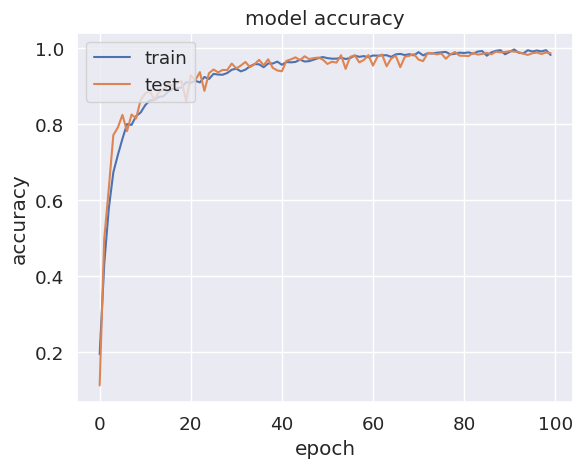

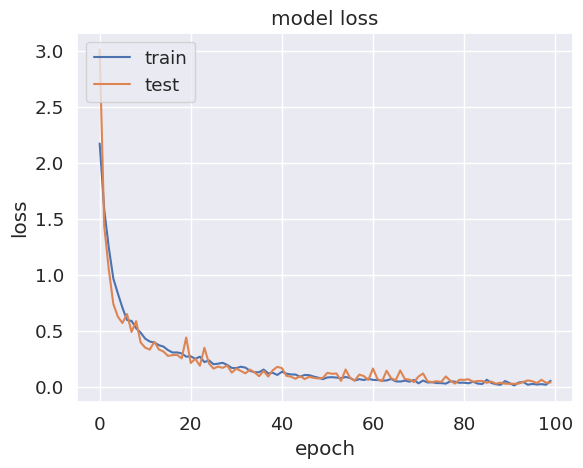

In [59]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[349   0   0   1   0   0   0   0   0   1   0]
 [  1 314   0   0   0   0   0   0   0   0   0]
 [  1   0 338   0   0   0   0   0   0   0   0]
 [  2   0   0 327   0   0   0   0   0   1   0]
 [  0   0   0   0 319   0   2   0   0   1   0]
 [  0   0   0   0   1 331   0   0   0   1   0]
 [  0   0   0   0   1   0 325   0   1   1   0]
 [  0   0   0   1   0   0   0 299   0   0   1]
 [  0   0   0   1   0   0   0   0 344   0   0]
 [  1   0   0   1   1   0   0   0   3 318   2]
 [  0   0   0   0   0   0   0   0   0   0 329]]


<Axes: >

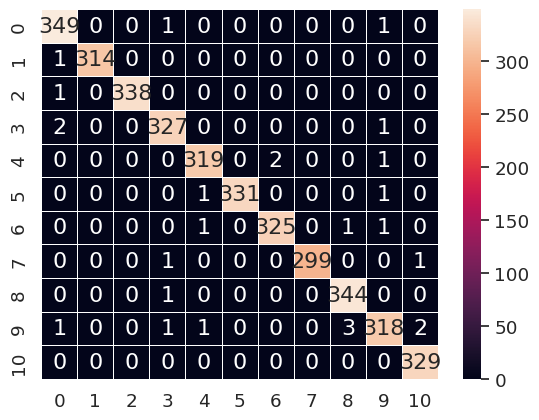

In [60]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_val, y_pred)
print(cm)
sn.set(font_scale=1.2)#for label size
sn.heatmap(cm, annot=True,fmt="d", linewidths=.5 ,annot_kws={"size": 16})# font size

## Xception

In [72]:
from keras.applications import Xception
def build_xception():
    xception = Xception(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = xception(x)
    x = Flatten(name="flatten")(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    # multi output
    output = Dense(11,activation = 'softmax', name='root')(x)
    # model
    model = Model(input,output)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [73]:
model_xception= build_xception()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 3)         │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ root (Dense)                         │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,555,783 (177.60 MB)

 Trainable params: 46,500,743 (177.39 MB)

 Non-trainable params: 55,040 (215.00 KB)

In [74]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Update filepath to use .keras extension
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# You can now fit your model and include these callbacks
# Example:
# model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, callbacks=[es, mc])


In [75]:
hist=model_xception.fit(X_train, Y_train,
               batch_size=BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               validation_data=(X_val, Y_val),
               callbacks=[es,mc])

Epoch 1/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.8076 - loss: 0.6501
Epoch 1: val_accuracy improved from -inf to 0.97458, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 116s 269ms/step - accuracy: 0.8081 - loss: 0.6483 - val_accuracy: 0.9746 - val_loss: 0.0826
Epoch 2/100
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9924 - loss: 0.0237
Epoch 2: val_accuracy improved from 0.97458 to 0.99475, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 30s 131ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9947 - val_loss: 0.0157
Epoch 3/100
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9954 - loss: 0.0168
Epoch 3: val_accuracy improved from 0.99475 to 0.99503, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 30s 131ms/step - accuracy: 0.9954 - loss: 0.0168 - val_accuracy: 0.9950 - val_loss: 0.0150
Epoch 4/100
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9976 - loss: 0.0091
Epoch 4: val_accura

In [76]:
from tensorflow.keras.models import load_model

# Load the saved model using the correct file extension
saved_model = load_model('best_model.keras')

In [77]:
y_pred = saved_model.predict(X_val)

114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step


In [78]:
y_pred=np.argmax(y_pred, axis=1)

In [79]:
Y_val=np.argmax(Y_val, axis=1)

In [80]:

print("Doğruluk: ",accuracy_score(Y_val, y_pred))
print("F1_Skor: ", f1_score(Y_val, y_pred,average="macro"))
print("Hassasiyet: ",precision_score(Y_val, y_pred,average="macro"))
print("Duyarlılık: ", recall_score(Y_val, y_pred,average="macro"))

Doğruluk:  1.0
F1_Skor:  1.0
Hassasiyet:  1.0
Duyarlılık:  1.0


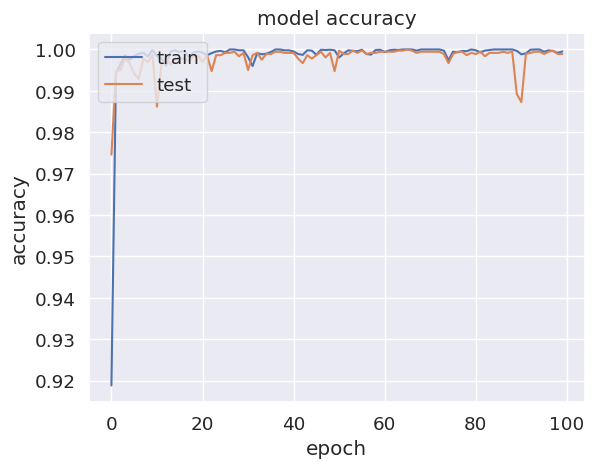

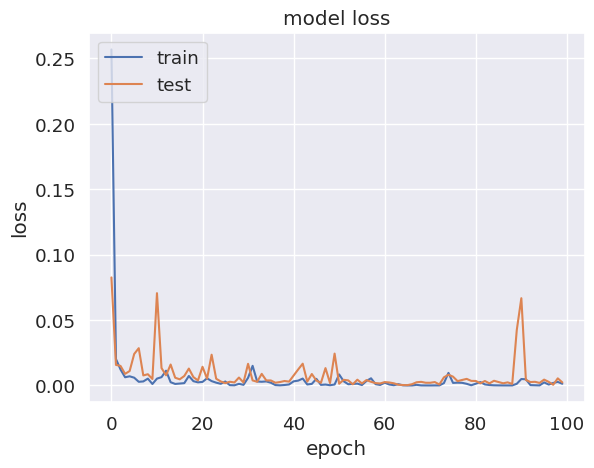

In [81]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[351   0   0   0   0   0   0   0   0   0   0]
 [  0 315   0   0   0   0   0   0   0   0   0]
 [  0   0 339   0   0   0   0   0   0   0   0]
 [  0   0   0 330   0   0   0   0   0   0   0]
 [  0   0   0   0 322   0   0   0   0   0   0]
 [  0   0   0   0   0 333   0   0   0   0   0]
 [  0   0   0   0   0   0 328   0   0   0   0]
 [  0   0   0   0   0   0   0 301   0   0   0]
 [  0   0   0   0   0   0   0   0 345   0   0]
 [  0   0   0   0   0   0   0   0   0 326   0]
 [  0   0   0   0   0   0   0   0   0   0 329]]


<Axes: >

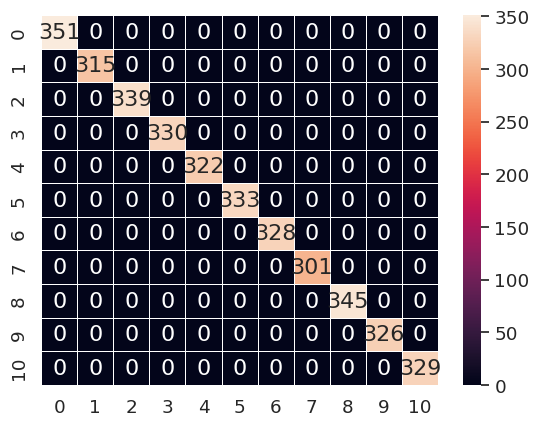

In [82]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_val, y_pred)
print(cm)
sn.set(font_scale=1.2)#for label size
sn.heatmap(cm, annot=True,fmt="d", linewidths=.5 ,annot_kws={"size": 16})# font size